In [106]:
import pandas as pd


df = pd.read_csv('madp_results.csv')

df.columns= ['name','config','param','run','time']

# replace 5 in params with 05
df['param'] = df['param'].str.replace('5', '05')
df['param'] = df['param'].str.replace('105', '15')

df.sort_values(by=['param'], inplace=True)

In [107]:
import numpy as np
# Group by 'name', 'config', and 'param' and calculate the mean
mean_df = df.groupby(['name', 'config', 'param']).mean().reset_index()

# Calculate the sum of times for each group
sum_df = df.groupby(['name', 'config', 'param'])['time'].sum().reset_index()

# Calculate the standard deviation for each group
std_df = df.groupby(['name', 'config', 'param'])['time'].std().reset_index()

# Calculate 95% confidence interval for each group
# The formula for a 95% confidence interval for the mean is: mean ± (1.96 * (std/sqrt(n)))
n = df.groupby(['name', 'config', 'param'])['time'].count().reset_index(name='count')
ci95_hi = []
ci95_lo = []

for i in std_df.index:
    m, s, c = mean_df.at[i, 'time'], std_df.at[i, 'time'], n.at[i, 'count']
    ci95_hi.append(m + 1.96 * (s/np.sqrt(c)))
    ci95_lo.append(m - 1.96 * (s/np.sqrt(c)))

confidence_interval_df = pd.DataFrame({
    'name': std_df['name'],
    'config': std_df['config'],
    'param': std_df['param'],
    'ci95_hi': ci95_hi,
    'ci95_lo': ci95_lo
})

# Since we cannot directly output plots, I will print the DataFrame that would be used for plotting.
mean_df, sum_df, std_df, confidence_interval_df

(    name     config         param   run      time
 0   madp  benchmark             0  16.0  0.617440
 1   madp    corrupt             0  15.5  0.714786
 2   madp    corrupt            05  15.5  1.021358
 3   madp    corrupt            10  15.5  1.310414
 4   madp      delay   normal100ms  15.5  5.819077
 5   madp      delay  uniform100ms  15.5  4.483472
 6   madp  duplicate             0  15.5  0.650969
 7   madp  duplicate            05  15.5  0.699793
 8   madp  duplicate            10  15.5  0.819554
 9   madp       loss             0  15.5  0.695843
 10  madp       loss            05  15.5  0.982786
 11  madp       loss            10  15.5  1.248057
 12  madp       loss            15  15.5  1.358992,
     name     config         param        time
 0   madp  benchmark             0   17.905758
 1   madp    corrupt             0   21.443580
 2   madp    corrupt            05   30.640742
 3   madp    corrupt            10   39.312417
 4   madp      delay   normal100ms  174.572303
 5 

In [108]:
large_size = 999.651 # byte
small_size = 9998 # byte

# total 10 objects for each

total_size = 10 * large_size + 10 * small_size # bytes

total_size_mb = total_size / 1000000 # MB

total_size_mb

0.10997651

In [109]:
merge = pd.merge(mean_df, confidence_interval_df, on=['config', 'param'])
merge['name'] = "ours"
merge = merge[['name', 'config', 'param', 'time', 'ci95_hi', 'ci95_lo']]
merge['throughput(Mbps)'] = (total_size_mb * 8) / merge['time']
merge['bandwidth(Mbps)'] = (total_size_mb * 8) / merge['ci95_hi']
merge

,name,config,param,time,ci95_hi,ci95_lo,throughput(Mbps),bandwidth(Mbps)
0,ours,benchmark,0,0.617440,0.701539,0.533341,1.424936,1.254117
1,ours,corrupt,0,0.714786,0.804890,0.624682,1.230875,1.093084
2,ours,corrupt,05,1.021358,1.174537,0.868179,0.861414,0.749071
3,ours,corrupt,10,1.310414,1.678217,0.942611,0.671400,0.524254
4,ours,delay,normal100ms,5.819077,5.989540,5.648614,0.151194,0.146891
5,ours,delay,uniform100ms,4.483472,4.539715,4.427228,0.196235,0.193803
6,ours,duplicate,0,0.650969,0.718258,0.583680,1.351542,1.224925
7,ours,duplicate,05,0.699793,0.764372,0.635213,1.257247,1.151026
8,ours,duplicate,10,0.819554,0.899594,0.739513,1.073526,0.978010
9,ours,loss,0,0.695843,0.775367,0.616319,1.264383,1.134704


# TCP

In [152]:
dftcp = pd.read_csv('tcp_results.csv')

dftcp.columns= ['name','config','param','run','time']

# replace 5 in params with 05
dftcp['param'] = dftcp['param'].str.replace('5', '05')
dftcp['param'] = dftcp['param'].str.replace('105', '15')

dftcp.sort_values(by=['param'], inplace=True)
dftcp

,name,config,param,run,time
0,tcp,benchmark,0,2,0.115458
215,tcp,loss,0,7,0.126413
216,tcp,loss,0,8,0.116967
217,tcp,loss,0,9,0.121039
218,tcp,loss,0,10,0.118896
...,...,...,...,...,...
360,tcp,delay,uniform100ms,2,2.262323
359,tcp,delay,uniform100ms,1,2.287050
387,tcp,delay,uniform100ms,29,2.287956
372,tcp,delay,uniform100ms,14,2.264717


In [153]:
mean_dftcp = dftcp.groupby(['name', 'config', 'param']).mean().reset_index()

# Calculate the sum of times for each group
sum_dftcp = dftcp.groupby(['name', 'config', 'param'])['time'].sum().reset_index()

# Calculate the standard deviation for each group
std_dftcp = dftcp.groupby(['name', 'config', 'param'])['time'].std().reset_index()

# Calculate 95% confidence interval for each group
# The formula for a 95% confidence interval for the mean is: mean ± (1.96 * (std/sqrt(n)))
n = dftcp.groupby(['name', 'config', 'param'])['time'].count().reset_index(name='count')
ci95_hi = []    
ci95_lo = []

for i in std_dftcp.index:
    m, s, c = mean_dftcp.at[i, 'time'], std_dftcp.at[i, 'time'], n.at[i, 'count']
    ci95_hi.append(m + 1.96 * (s/np.sqrt(c)))
    ci95_lo.append(m - 1.96 * (s/np.sqrt(c)))

confidence_interval_dftcp = pd.DataFrame({
    'name': std_dftcp['name'],
    'config': std_dftcp['config'],
    'param': std_dftcp['param'],
    'ci95_hi': ci95_hi,
    'ci95_lo': ci95_lo
})

# Since we cannot directly output plots, I will print the DataFrame that would be used for plotting.
mean_dftcp, sum_dftcp, std_dftcp, confidence_interval_dftcp

(   name     config         param   run        time
 0   tcp  benchmark             0  16.0    0.119939
 1   tcp    corrupt             0  15.5    0.120125
 2   tcp    corrupt            05  15.5    4.990265
 3   tcp    corrupt            10  15.5   17.664952
 4   tcp      delay   normal100ms  15.5    9.144921
 5   tcp      delay  uniform100ms  15.5    2.284835
 6   tcp  duplicate             0  15.5    0.121505
 7   tcp  duplicate            05  15.5    0.171336
 8   tcp  duplicate            10  15.5    0.169139
 9   tcp       loss             0  15.5    0.119610
 10  tcp       loss            05  15.5    4.300359
 11  tcp       loss            10  15.5   22.965039
 12  tcp       loss            15  15.5  204.609797,
    name     config         param         time
 0   tcp  benchmark             0     3.478232
 1   tcp    corrupt             0     3.603752
 2   tcp    corrupt            05   149.707947
 3   tcp    corrupt            10   529.948558
 4   tcp      delay   normal100ms   

In [154]:
mergetcp = pd.merge(mean_dftcp, confidence_interval_dftcp, on=['config', 'param'])
mergetcp['name'] = "tcp"
mergetcp = mergetcp[['name', 'config', 'param', 'time', 'ci95_hi', 'ci95_lo']]
mergetcp['throughput(Mbps)'] = (total_size_mb * 8) / mergetcp['time']
mergetcp['bandwidth(Mbps)'] = (total_size_mb * 8) / mergetcp['ci95_hi']
mergetcp

,name,config,param,time,ci95_hi,ci95_lo,throughput(Mbps),bandwidth(Mbps)
0,tcp,benchmark,0,0.119939,0.121344,0.118534,7.335493,7.250580
1,tcp,corrupt,0,0.120125,0.121509,0.118741,7.324134,7.240734
2,tcp,corrupt,05,4.990265,5.187837,4.792693,0.176306,0.169591
3,tcp,corrupt,10,17.664952,19.318996,16.010908,0.049806,0.045541
4,tcp,delay,normal100ms,9.144921,10.128425,8.161418,0.096208,0.086866
5,tcp,delay,uniform100ms,2.284835,2.294670,2.275001,0.385066,0.383416
6,tcp,duplicate,0,0.121505,0.122990,0.120021,7.240931,7.153549
7,tcp,duplicate,05,0.171336,0.178393,0.164280,5.134999,4.931871
8,tcp,duplicate,10,0.169139,0.180373,0.157905,5.201707,4.877735
9,tcp,loss,0,0.119610,0.120995,0.118226,7.355666,7.271501


0 loss
1 duplicate
2 corrupt
3 delay


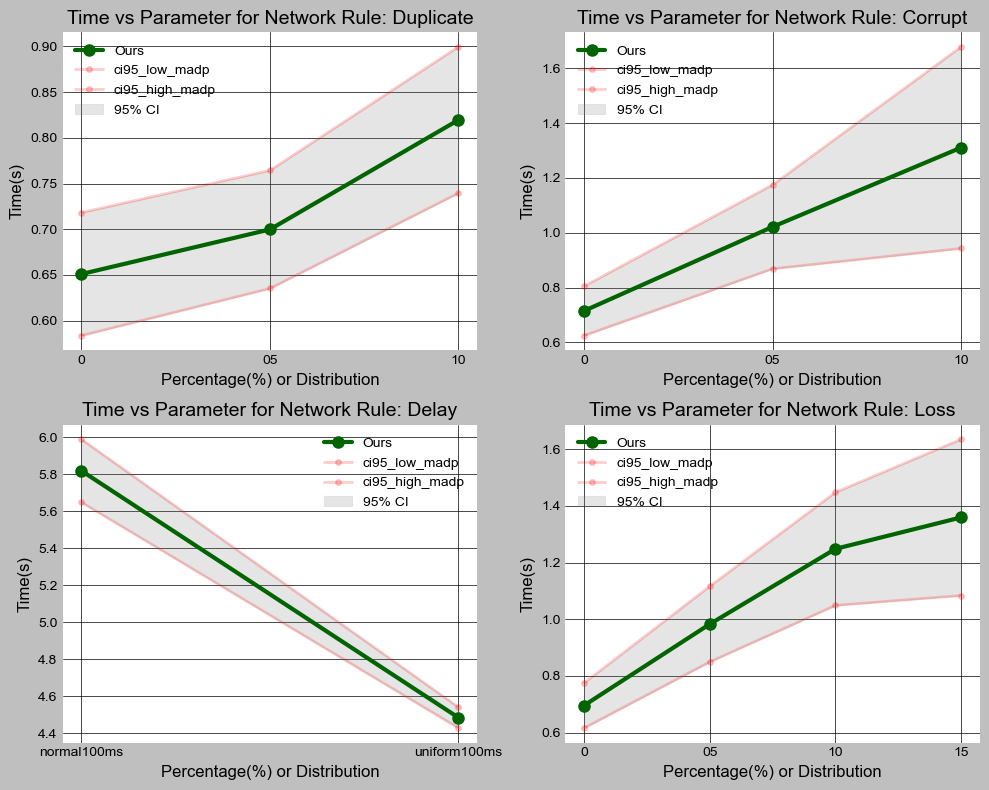

In [161]:
from matplotlib import pyplot as plt

# Improved plotting code
plt.style.use('grayscale')  # Using a different style for a more polished look

# Number of rows and columns for the subplot grid
nrows = 2
ncols = 2

# Create subplots
# fig, axs = plt.subplots(nrows, ncols, figsize=(10, 4 ))

# Flatten the axs array for easy indexing
axs = axs.flatten()

for i, config in enumerate(configs):
    if i >= nrows * ncols:
        break
    config_df = mean_df[mean_df['config'] == config]
    ci_df = confidence_interval_df[confidence_interval_df['config'] == config]
    fig, ax = plt.subplots(figsize=(10, 4))
    print(i,config)
    # ax = axs[i-1] 
    ax.plot(config_df['param'], config_df['time'], label="Ours", linewidth=3, marker='o', markersize=8, color='darkgreen')
    # ax.errorbar(config_df['param'], config_df['time'], yerr=[config_df['time'] - ci_df['ci95_lo'], ci_df['ci95_hi'] - config_df['time']], label="Err. Bar Ours", linewidth=2, marker='o', markersize=8, color='green')
    # ax.errorbar(config_df['param'], config_df['time'], yerr=[config_df['time'] - ci_df['ci95_lo'], ci_df['ci95_hi'] - config_df['time']], label=config, linewidth=2, marker='o', markersize=8, color='gray')
    ax.plot(config_df['param'], ci_df['ci95_lo'], label="ci95_low_madp", linewidth=2,alpha=0.2, marker='o', markersize=4, color='red')
    ax.plot(config_df['param'], ci_df['ci95_hi'], label="ci95_high_madp", linewidth=2,alpha=0.2, marker='o', markersize=4, color='red')
    # Shaded area for confidence interval
    ax.fill_between(config_df['param'], ci_df['ci95_lo'], ci_df['ci95_hi'], alpha=0.2,  color='gray', label='95% CI')


    # config_dftcp = mean_dftcp[mean_dftcp['config'] == config]
    # ci_dftcp = confidence_interval_dftcp[confidence_interval_dftcp['config'] == config]
    # # fig, ax = plt.subplots(figsize=(8, 4))
    # ax.plot(config_dftcp['param'], config_dftcp['time'], label="TCP", linewidth=3, marker='o', markersize=8, color='darkblue')
    # # ax.errorbar(config_dftcp['param'], config_dftcp['time'], yerr=[config_dftcp['time'] - ci_dftcp['ci95_lo'], ci_dftcp['ci95_hi'] - config_dftcp['time']], label="Err. Bar TCP", linewidth=2, marker='o', markersize=8, color='blue')
    # # ax.errorbar(config_dftcp['param'], config_dftcp['time'], yerr=[config_dftcp['time'] - ci_dftcp['ci95_lo'], ci_dftcp['ci95_hi'] - config_dftcp['time']], label=config, linewidth=2, marker='o', markersize=8, color='gray')
    # ax.plot(config_dftcp['param'], ci_dftcp['ci95_lo'], label="ci95_low_tcp", linewidth=2,alpha=0.2, marker='o', markersize=4, color='red')
    # ax.plot(config_dftcp['param'], ci_dftcp['ci95_hi'], label="ci95_high_tcp", linewidth=2,alpha=0.2, marker='o', markersize=4, color='red')
    # # Shaded area for confidence interval
    # ax.fill_between(config_dftcp['param'], ci_dftcp['ci95_lo'], ci_dftcp['ci95_hi'], alpha=0.2,  color='gray', label='95% CI')


    ax.set_xlabel('Percentage(%) or Distribution', fontsize=12)
    ax.set_ylabel('Time(s)', fontsize=12)
    ax.legend()
    ax.grid(True)  # Adding gridlines for better readability

    ax.set_title(f"Time vs Parameter for Network Rule: {config.capitalize()}", fontsize=14)

plt.tight_layout()
plt.show()